In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from google.colab import files

In [94]:
# Step 1: Upload the dataset from local
uploaded = files.upload()

Saving Country-data.csv to Country-data (3).csv


In [95]:
# Step 2: Load the dataset
data = pd.read_csv(next(iter(uploaded.keys())))

In [96]:
# Step 3: Initial Data Exploration
print("First few rows of the dataset:")
print(data.head())
print("\nData types and missing values:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())

First few rows of the dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   c

In [97]:
# Step 4: Handle Missing Values (if any)
print("\nMissing values in each column:")
print(data.isnull().sum())

# Select only numeric columns for filling missing values
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())  # Fill missing values with column mean


Missing values in each column:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [98]:
# Step 5: Data Preprocessing
# Standardize the features for better K-means performance
scaler = StandardScaler()

# Exclude the 'Country' column before scaling
numeric_data = data.drop(columns=['Country'], errors='ignore').select_dtypes(include=np.number)

# Fit and transform the scaler on numeric data only
data_scaled = scaler.fit_transform(numeric_data)

print("\nFirst few rows of the scaled data:")
print(pd.DataFrame(data_scaled, columns=numeric_data.columns).head())


First few rows of the scaled data:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


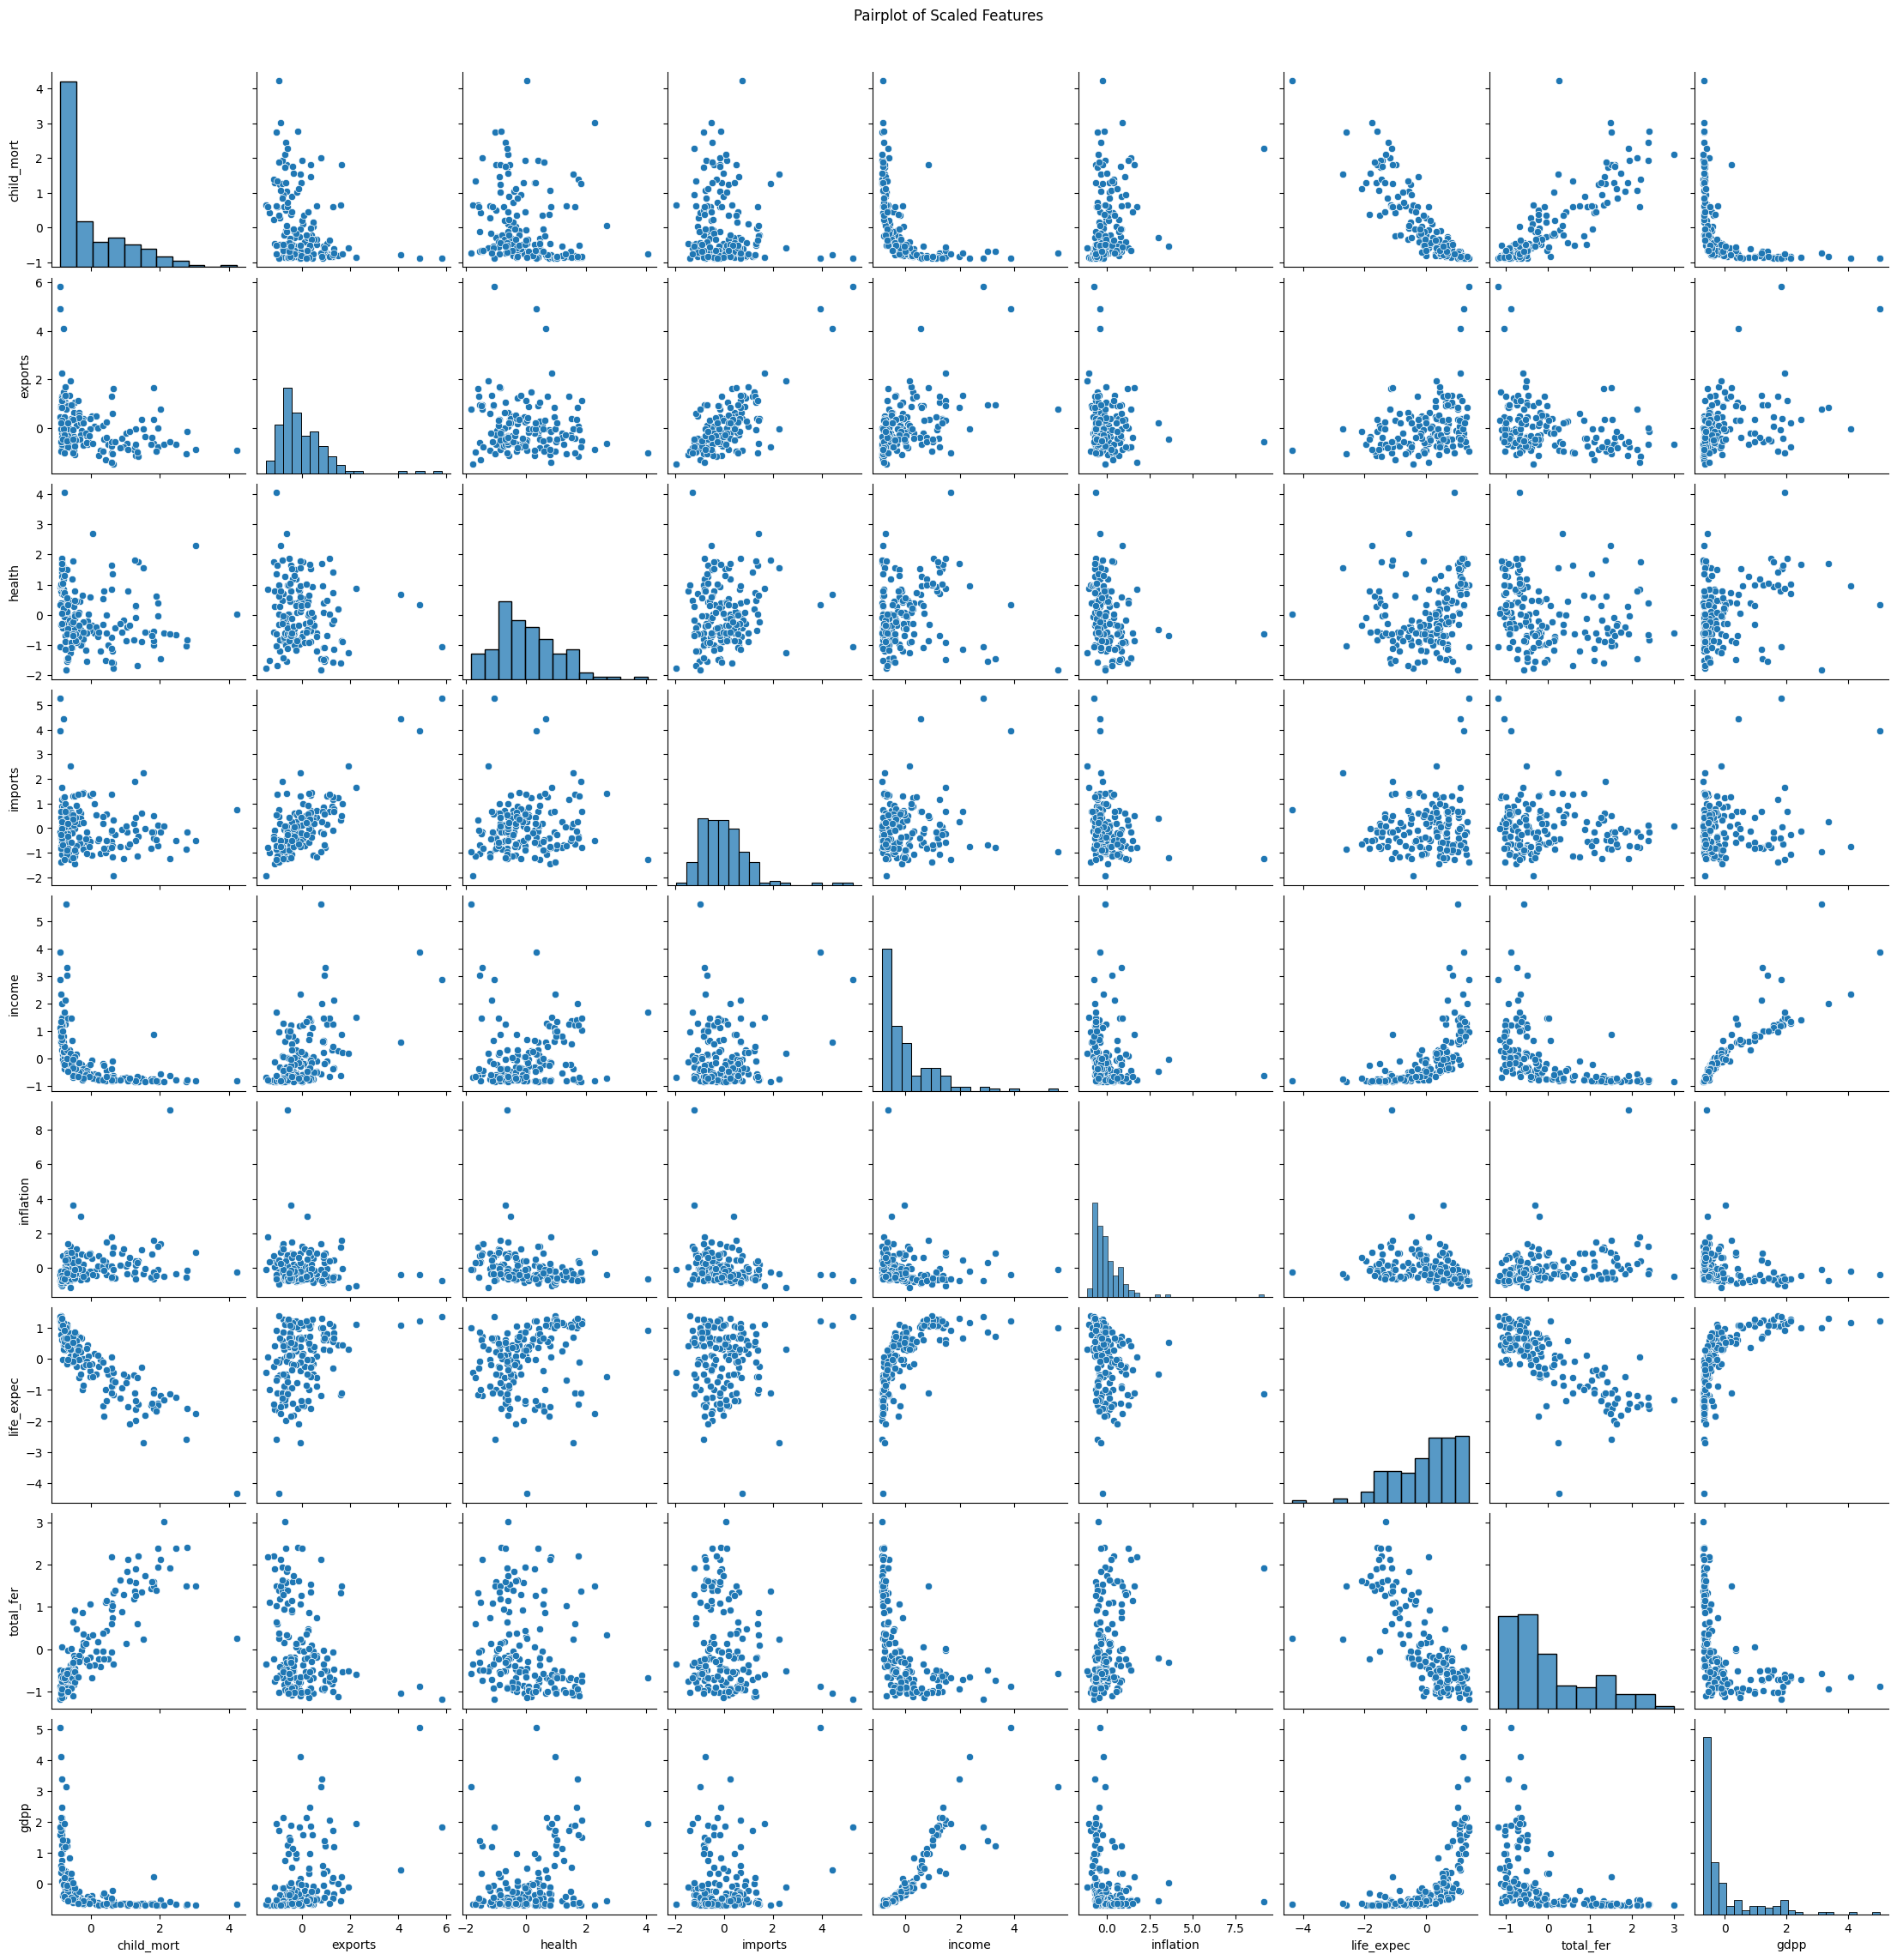

In [99]:
# Step 6: Exploratory Data Analysis (EDA)
# Plot pairplot for data visualization
# Get the column names excluding 'Country'
columns = data.columns.drop('country', errors='ignore')

# Create the DataFrame using data_scaled and the updated columns
sns.pairplot(pd.DataFrame(data_scaled, columns=columns))

plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

In [100]:
pca = PCA(n_components=0.95)  # We'll focus on the first 2 components for visualization
X_pca = pca.fit_transform(data_scaled)

# Variance of each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance of Principal Components:\n", explained_variance)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:\n", cumulative_variance)



Explained Variance of Principal Components:
 [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235]

Cumulative Explained Variance:
 [0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232]


the above code for principal component analysis(PCA)

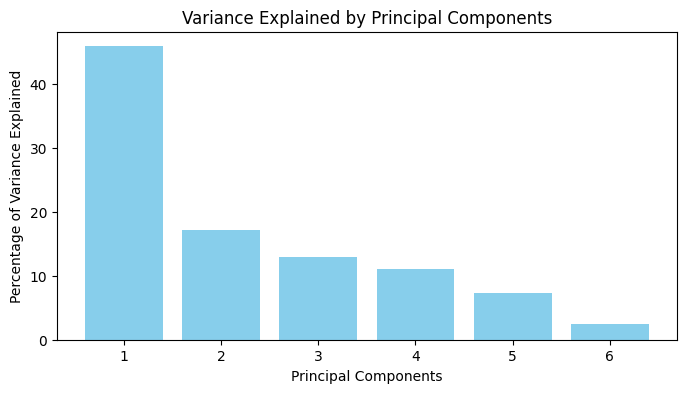

In [101]:
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, color='skyblue')
plt.title("Variance Explained by Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Variance Explained")
plt.show()

In [102]:
# Step 7: Determine Optimal Number of Clusters with Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
possible_k = range(2, 11)  # Testing clusters from 2 to 10

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=1)
    cluster_labels = kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is: {silhouette_avg}")


For n_clusters = 2, the silhouette score is: 0.29637364602520666
For n_clusters = 3, the silhouette score is: 0.29930483651158524
For n_clusters = 4, the silhouette score is: 0.22373636930601548
For n_clusters = 5, the silhouette score is: 0.2349011943500181
For n_clusters = 6, the silhouette score is: 0.24443807014322053
For n_clusters = 7, the silhouette score is: 0.26301954051455995
For n_clusters = 8, the silhouette score is: 0.2042756157426663
For n_clusters = 9, the silhouette score is: 0.21500293578373086
For n_clusters = 10, the silhouette score is: 0.2258111146231888


Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

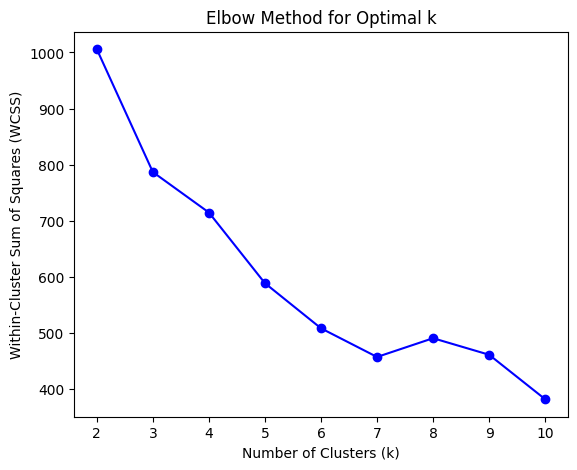

In [103]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(possible_k, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

Text(0, 0.5, 'Silhouette Score')

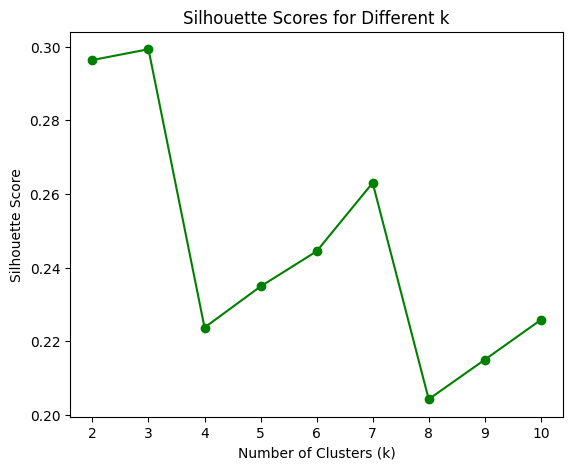

In [104]:
# Plot Silhouette Score to select optimal number of clusters
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(possible_k, silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

In [105]:
# Choose the ideal k based on the highest silhouette score
optimal_k = possible_k[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")


Optimal number of clusters based on Silhouette Score: 3


In [106]:
# Step 8: Fit K-means Clustering with Optimal k
kmeans = KMeans(n_clusters= optimal_k, random_state=1)
clusters = kmeans.fit_predict(X_pca)

In [107]:
# Add cluster labels to the original data
data['Cluster'] = clusters

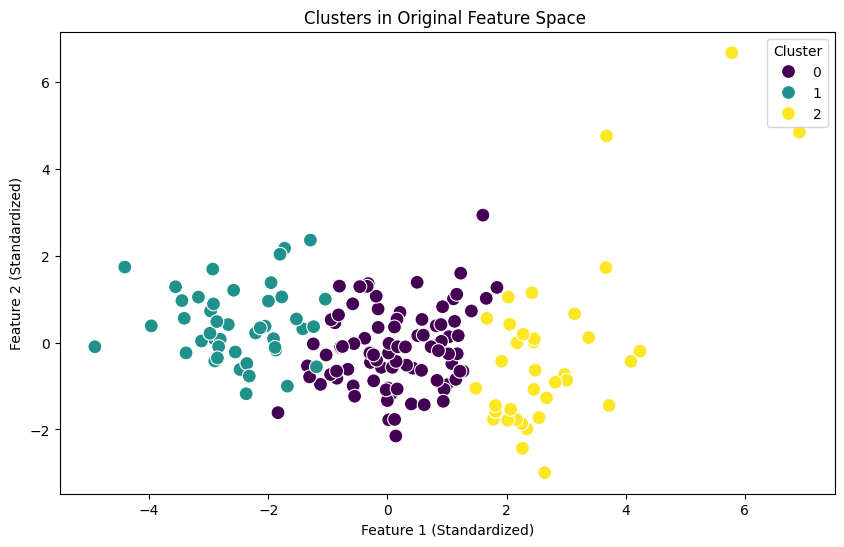

In [108]:
# Step 8: Visualize Clusters  PCA
# Select two features to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title("Clusters in Original Feature Space ")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title='Cluster')
plt.show()




Principal Component Loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6
Feature 0 -0.419519  0.192884 -0.029544  0.370653 -0.168970 -0.200628
Feature 1  0.283897  0.613163  0.144761  0.003091  0.057616  0.059333
Feature 2  0.150838 -0.243087 -0.596632  0.461897  0.518000 -0.007276
Feature 3  0.161482  0.671821 -0.299927 -0.071907  0.255376  0.030032
Feature 4  0.398441  0.022536  0.301548  0.392159 -0.247150 -0.160347
Feature 5 -0.193173 -0.008404  0.642520  0.150442  0.714869 -0.066285
Feature 6  0.425839 -0.222707  0.113919 -0.203797  0.108220  0.601127
Feature 7 -0.403729  0.155233  0.019549  0.378304 -0.135262  0.750689
Feature 8  0.392645 -0.046022  0.122977  0.531995 -0.180167 -0.016779


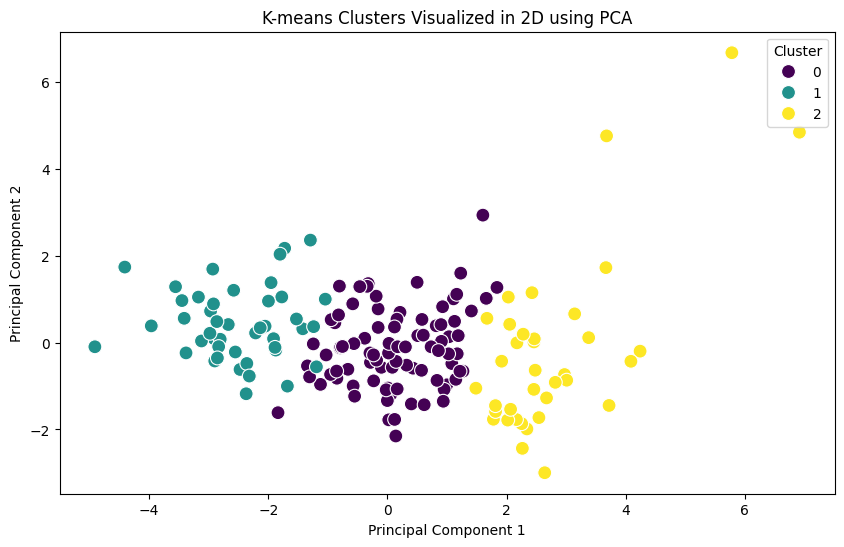

In [109]:

feature_names = X_pca.columns if isinstance(X_pca, pd.DataFrame) else [f"Feature {i}" for i in range(data_scaled.shape[1])]

# Create a DataFrame for the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(pca.n_components_)], index=feature_names)

print("\nPrincipal Component Loadings:\n", loadings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title("K-means Clusters Visualized in 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

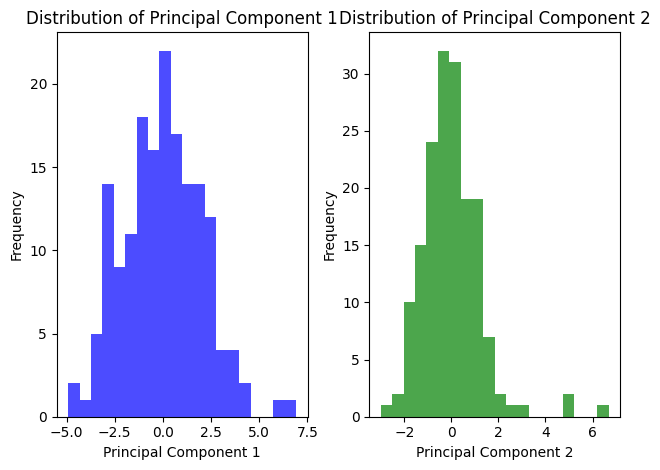

In [110]:
plt.subplot(1, 2, 1)
plt.hist(X_pca[:, 0], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Principal Component 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Frequency')

# Histogram for Principal Component 2
plt.subplot(1, 2, 2)
plt.hist(X_pca[:, 1], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Principal Component 2')
plt.xlabel('Principal Component 2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [111]:
# Step 10: Silhouette Score for Cluster Evaluation
silhouette_avg = silhouette_score(data_scaled, clusters)
print("\nSilhouette Score for the final clustering:", silhouette_avg)


Silhouette Score for the final clustering: 0.285600988953231


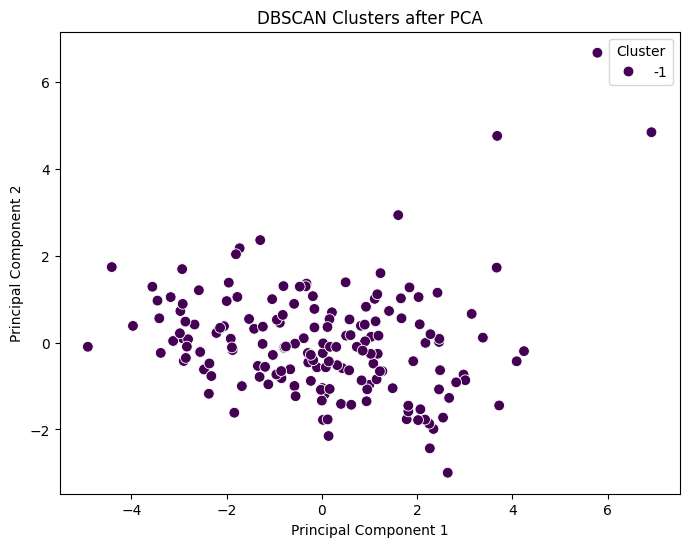

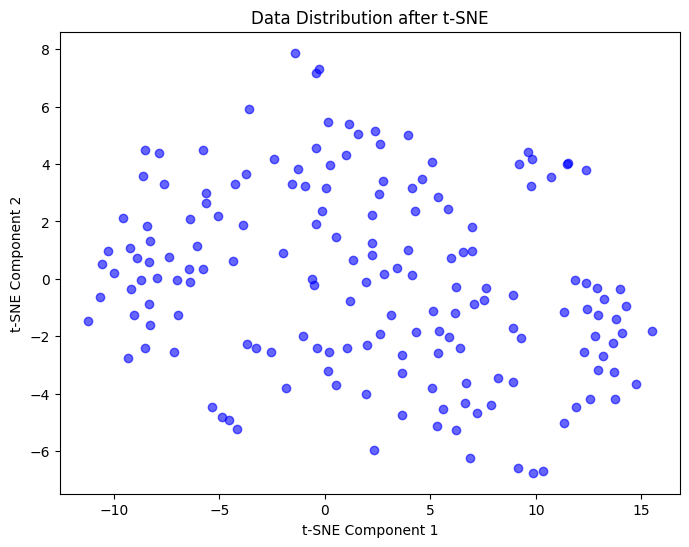

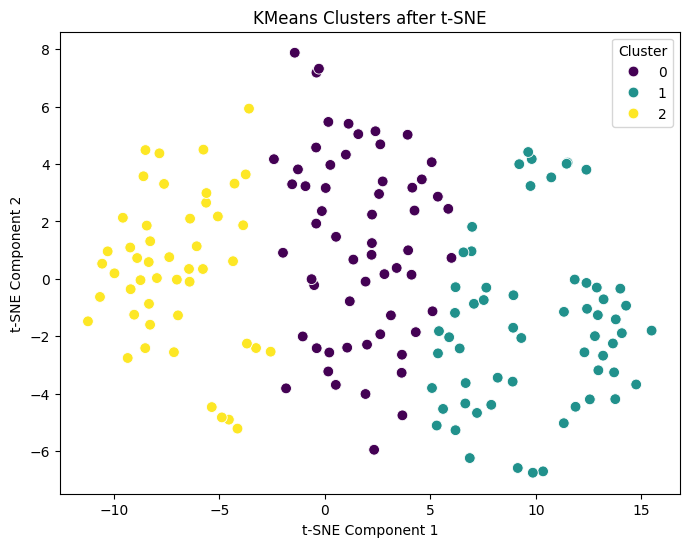

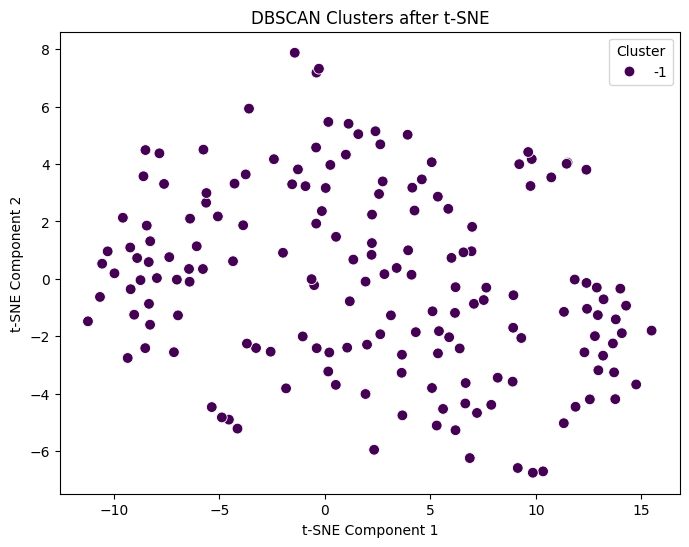

KMeans Silhouette Score (t-SNE): 0.43114695
DBSCAN did not form enough clusters for silhouette scoring on t-SNE data.


In [112]:
bscan = DBSCAN(eps=0.5, min_samples=5)  # Modify `eps` and `min_samples` for better results
dbscan_clusters_pca = dbscan.fit_predict(X_pca)

# Visualize DBSCAN Clusters on PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_clusters_pca, palette='viridis', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("DBSCAN Clusters after PCA")
plt.legend(title='Cluster')
plt.show()

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=1)
X_tsne = tsne.fit_transform(data_scaled)

# Plot t-SNE distribution
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, c='blue')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title("Data Distribution after t-SNE")
plt.show()

# KMeans Clustering on t-SNE-reduced data
kmeans_tsne = KMeans(n_clusters=optimal_k, random_state=1)
kmeans_clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

# Visualize KMeans Clusters on t-SNE-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_clusters_tsne, palette='viridis', s=60)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title("KMeans Clusters after t-SNE")
plt.legend(title='Cluster')
plt.show()

# DBSCAN Clustering on t-SNE-reduced data
dbscan_tsne = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters_tsne = dbscan_tsne.fit_predict(X_tsne)

# Visualize DBSCAN Clusters on t-SNE-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=dbscan_clusters_tsne, palette='viridis', s=60)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title("DBSCAN Clusters after t-SNE")
plt.legend(title='Cluster')
plt.show()

# Print Silhouette Scores to evaluate clustering quality
if len(set(kmeans_clusters_tsne)) > 1:  # Ensure more than 1 cluster
    silhouette_kmeans_tsne = silhouette_score(X_tsne, kmeans_clusters_tsne)
    print("KMeans Silhouette Score (t-SNE):", silhouette_kmeans_tsne)

if len(set(dbscan_clusters_tsne)) > 1:  # Ensure more than 1 cluster
    silhouette_dbscan_tsne = silhouette_score(X_tsne, dbscan_clusters_tsne)
    print("DBSCAN Silhouette Score (t-SNE):", silhouette_dbscan_tsne)
else:
    print("DBSCAN did not form enough clusters for silhouette scoring on t-SNE data.")